<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Credit Card Fraud Detection
# (Models based on engineered features)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Re-load-of-cleaned-data-from-CSV" data-toc-modified-id="Re-load-of-cleaned-data-from-CSV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Re-load of cleaned data from CSV</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Data-sort-prior-to-time-series-calculations" data-toc-modified-id="Data-sort-prior-to-time-series-calculations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data sort prior to time series calculations</a></span></li><li><span><a href="#Adding-time-series-features" data-toc-modified-id="Adding-time-series-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Adding time-series features</a></span></li><li><span><a href="#Features-influenced-by-EDA-findings" data-toc-modified-id="Features-influenced-by-EDA-findings-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Features influenced by EDA findings</a></span></li></ul></li><li><span><a href="#Modelling-preparation" data-toc-modified-id="Modelling-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelling preparation</a></span><ul class="toc-item"><li><span><a href="#Dummy-categorical-variables" data-toc-modified-id="Dummy-categorical-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dummy categorical variables</a></span></li><li><span><a href="#Test/Train-split-on-the-new-data-set." data-toc-modified-id="Test/Train-split-on-the-new-data-set.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Test/Train split on the new data set.</a></span></li><li><span><a href="#Undersample-the-new-data-set-(including-engineered-features)" data-toc-modified-id="Undersample-the-new-data-set-(including-engineered-features)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Undersample the new data set (including engineered features)</a></span></li><li><span><a href="#Heatmap-of-the-updated-feature-matrix" data-toc-modified-id="Heatmap-of-the-updated-feature-matrix-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Heatmap of the updated feature matrix</a></span></li><li><span><a href="#Standardise-the-data" data-toc-modified-id="Standardise-the-data-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Standardise the data</a></span></li></ul></li><li><span><a href="#Models-with-Engineered-Features." data-toc-modified-id="Models-with-Engineered-Features.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Models with Engineered Features.</a></span><ul class="toc-item"><li><span><a href="#Definition-of-scoring-function" data-toc-modified-id="Definition-of-scoring-function-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Definition of scoring function</a></span></li><li><span><a href="#Decision-Tree-with-bagging" data-toc-modified-id="Decision-Tree-with-bagging-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Decision Tree with bagging</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li><li><span><a href="#Grid-search-for-better-XGBoost-parameters" data-toc-modified-id="Grid-search-for-better-XGBoost-parameters-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Grid search for better XGBoost parameters</a></span></li><li><span><a href="#Shifting-the-prediction-threshold" data-toc-modified-id="Shifting-the-prediction-threshold-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Shifting the prediction threshold</a></span></li><li><span><a href="#Scoring-for-adjusted-threshold" data-toc-modified-id="Scoring-for-adjusted-threshold-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Scoring for adjusted threshold</a></span></li><li><span><a href="#Experiment---ANN-Classifier" data-toc-modified-id="Experiment---ANN-Classifier-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Experiment - ANN Classifier</a></span></li></ul></li><li><span><a href="#Further-Work" data-toc-modified-id="Further-Work-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further Work</a></span></li></ul></div>

In [2]:
from pprint import pprint
import numpy as np
import pandas as pd
import re
import time
import math
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime

## Re-load of cleaned data from CSV
(See Data Merging and Cleaning Notebook for how this data was created).

In [3]:
tx_aug_df = pd.read_csv('~/GA/capstone2-data/augmented2_cc_txs.csv')

In [4]:
# ensure (after re-loading) that tx_date_time is in native datetime form
tx_aug_df.tx_date_time = pd.to_datetime( tx_aug_df.tx_date_time )

In [5]:
tx_aug_df.head()

,user_id,card,tx_year,tx_month,tx_day,tx_time,tx_amount,tx_use_chip,tx_merchant_name,tx_merchant_city,...,cc_card_number,cc_expires,cc_cvv,cc_has_chip,cc_cards_issued,cc_credit_limit,cc_acct_open_date,cc_year_pin_last_changed,cc_card_on_dark_web,tx_datetime_float
0,0,0,2002,9,1,06:21,134.09,Swipe Transaction,3527213246127876953,La Verne,...,4344676511950444,738490,623,1,2,24295.0,731094,2008,0,1.030858e+09
1,0,0,2002,9,1,06:42,38.48,Swipe Transaction,-727612092139916043,Monterey Park,...,4344676511950444,738490,623,1,2,24295.0,731094,2008,0,1.030859e+09
2,0,0,2002,9,2,06:22,120.34,Swipe Transaction,-727612092139916043,Monterey Park,...,4344676511950444,738490,623,1,2,24295.0,731094,2008,0,1.030944e+09
3,0,0,2002,9,2,17:45,128.95,Swipe Transaction,3414527459579106770,Monterey Park,...,4344676511950444,738490,623,1,2,24295.0,731094,2008,0,1.030985e+09
4,0,0,2002,9,3,06:23,104.71,Swipe Transaction,5817218446178736267,La Verne,...,4344676511950444,738490,623,1,2,24295.0,731094,2008,0,1.031031e+09


In [6]:
tx_aug_df.shape

(4465569, 52)

## Feature Engineering
Here we will add various features to the data set which we anticipate will improve the performance of our models.  Several of these features will be "time-series" type, so that the aspects of the previous transaction(s) may also influence whether we predict the current transaction as fraud or not.

In [7]:
retained_cols = ['user_id', 'card',
       'tx_amount', 'tx_use_chip',# 'tx_merchant_name',
       'tx_zip', 'tx_mcc','tx_is_fraud',
       'tx_hour', 'tx_fraud_error',
       'tx_abroad', 'tx_online', 'usr_current_age',
       'usr_retirement_age', 'usr_birth_year', 'usr_gender',
       'usr_zipcode',
       'usr_latitude', 'usr_longitude', 'usr_per_capita_income_zipcode',
       'usr_yearly_income_person', 'usr_total_debt', 'usr_fico_score',
       'usr_num_credit_cards', 'usr_apartment_set', 'cc_card_brand',
       'cc_card_type', 'cc_expires', 'cc_has_chip',
       'cc_cards_issued', 'cc_credit_limit', 'cc_acct_open_date',
       'cc_year_pin_last_changed', 'tx_datetime_float']

In [8]:
# Create X_eng by keeping just the columns we want.
X_eng = tx_aug_df[retained_cols].copy()

In [9]:
X_eng.shape

(4465569, 33)

In [10]:
X_eng.head()

,user_id,card,tx_amount,tx_use_chip,tx_zip,tx_mcc,tx_is_fraud,tx_hour,tx_fraud_error,tx_abroad,...,usr_apartment_set,cc_card_brand,cc_card_type,cc_expires,cc_has_chip,cc_cards_issued,cc_credit_limit,cc_acct_open_date,cc_year_pin_last_changed,tx_datetime_float
0,0,0,134.09,Swipe Transaction,91750.0,5300,0,6,0,0,...,0,Visa,Debit,738490,1,2,24295.0,731094,2008,1.030858e+09
1,0,0,38.48,Swipe Transaction,91754.0,5411,0,6,0,0,...,0,Visa,Debit,738490,1,2,24295.0,731094,2008,1.030859e+09
2,0,0,120.34,Swipe Transaction,91754.0,5411,0,6,0,0,...,0,Visa,Debit,738490,1,2,24295.0,731094,2008,1.030944e+09
3,0,0,128.95,Swipe Transaction,91754.0,5651,0,17,0,0,...,0,Visa,Debit,738490,1,2,24295.0,731094,2008,1.030985e+09
4,0,0,104.71,Swipe Transaction,91750.0,5912,0,6,0,0,...,0,Visa,Debit,738490,1,2,24295.0,731094,2008,1.031031e+09


### Data sort prior to time series calculations

In [11]:
# sort X_eng to ensure it's sorted by user, card and transaction time, then re-index.
# This will ensure that time series operations are applied to transactions which are consecutive
# by user, then card, then date/time.
X_eng.sort_values(by=['user_id','card','tx_datetime_float']).reset_index(drop=True, inplace=True)

### Adding time-series features
In this section we engineer some features which will add context to our transactions, i.e. help to identify if they are incongruent.  We will focus on transaction amounts and locations.

In [12]:
# Create new time-series columns
X_eng['avg_amount'] = 0.0 # average transaction amount by user and card
X_eng['last_amount'] = 0.0 # amount of the last transaction
X_eng['rng_avg_amount'] = 0.0 # running average of the last 'n' transactions for this user and card
X_eng['last_tx_zip'] = 0.0 # zip code of previous transaction.

# number of credit card transactions to include in running average amount.
running_average_samples=5

# determine the number of users for loop below
num_users = X_eng.user_id.max() + 1

for user_id in range(0,num_users):
    print("doing time series stuff for user: ", user_id, "... ", end='')
    
    # determine how many cards this user holds
    num_cards = X_eng[X_eng.user_id == user_id].card.max() + 1
    for card in range(0, num_cards):
        # calculate the average transaction amount for this user and card for filling blank values.
        avg_amount = round(X_eng[(X_eng.user_id == user_id) & (X_eng.card == card)].tx_amount.mean(),2)
        
        # add average amount to every row for this user and card.
        X_eng.loc[(X_eng.user_id == user_id) & (X_eng.card == card),'avg_amount'] = avg_amount
        
        # fill the last_amount column for this card and user using tx_amount shifted.
        X_eng.loc[(X_eng.user_id == user_id) & (X_eng.card == card),'last_amount'] = \
                    X_eng[(X_eng.user_id == user_id) & (X_eng.card == card)].tx_amount.shift(fill_value=avg_amount)
        
        # work out the running average of transaction amount using the last 'running_average_samples' samples
        # and shift it 1 sample back, so it's the running average before this sample.
        X_eng.loc[(X_eng.user_id == user_id) & (X_eng.card == card),'rng_avg_amount'] = \
                X_eng[(X_eng.user_id == user_id) & (X_eng.card == card)].tx_amount.rolling(window=running_average_samples, \
                                                            center=False, min_periods=1).mean().shift(fill_value=avg_amount)
        
        # work out the average tx_zip code for this user & card for filling blank values.
        avg_zip = round(X_eng[(X_eng.user_id == user_id) & (X_eng.card == card)].tx_zip.mean(),0)
        # set up column with the last transaction's zip code in it.
        X_eng.loc[(X_eng.user_id == user_id) & (X_eng.card == card),'last_tx_zip'] = \
                    X_eng[(X_eng.user_id == user_id) & (X_eng.card == card)].tx_zip.shift(fill_value=avg_zip)
        
    print("done.")

doing time series stuff for user:  0 ... done.
doing time series stuff for user:  1 ... done.
doing time series stuff for user:  2 ... done.
doing time series stuff for user:  3 ... done.
doing time series stuff for user:  4 ... done.
doing time series stuff for user:  5 ... done.
doing time series stuff for user:  6 ... done.
doing time series stuff for user:  7 ... done.
doing time series stuff for user:  8 ... done.
doing time series stuff for user:  9 ... done.
doing time series stuff for user:  10 ... done.
doing time series stuff for user:  11 ... done.
doing time series stuff for user:  12 ... done.
doing time series stuff for user:  13 ... done.
doing time series stuff for user:  14 ... done.
doing time series stuff for user:  15 ... done.
doing time series stuff for user:  16 ... done.
doing time series stuff for user:  17 ... done.
doing time series stuff for user:  18 ... done.
doing time series stuff for user:  19 ... done.
doing time series stuff for user:  20 ... done.
do

doing time series stuff for user:  169 ... done.
doing time series stuff for user:  170 ... done.
doing time series stuff for user:  171 ... done.
doing time series stuff for user:  172 ... done.
doing time series stuff for user:  173 ... done.
doing time series stuff for user:  174 ... done.
doing time series stuff for user:  175 ... done.
doing time series stuff for user:  176 ... done.
doing time series stuff for user:  177 ... done.
doing time series stuff for user:  178 ... done.
doing time series stuff for user:  179 ... done.
doing time series stuff for user:  180 ... done.
doing time series stuff for user:  181 ... done.
doing time series stuff for user:  182 ... done.
doing time series stuff for user:  183 ... done.
doing time series stuff for user:  184 ... done.
doing time series stuff for user:  185 ... done.
doing time series stuff for user:  186 ... done.
doing time series stuff for user:  187 ... done.
doing time series stuff for user:  188 ... done.
doing time series st

doing time series stuff for user:  336 ... done.
doing time series stuff for user:  337 ... done.
doing time series stuff for user:  338 ... done.
doing time series stuff for user:  339 ... done.
doing time series stuff for user:  340 ... done.
doing time series stuff for user:  341 ... done.
doing time series stuff for user:  342 ... done.
doing time series stuff for user:  343 ... done.
doing time series stuff for user:  344 ... done.
doing time series stuff for user:  345 ... done.
doing time series stuff for user:  346 ... done.
doing time series stuff for user:  347 ... done.
doing time series stuff for user:  348 ... done.
doing time series stuff for user:  349 ... done.
doing time series stuff for user:  350 ... done.
doing time series stuff for user:  351 ... done.
doing time series stuff for user:  352 ... done.
doing time series stuff for user:  353 ... done.
doing time series stuff for user:  354 ... done.
doing time series stuff for user:  355 ... done.
doing time series st

Now we can add some columns which give us the difference between the values of each transaction and those from the previous transactions.

In [13]:
# Create some difference columns using the new time-series columns
# firstly columns focussing on transaction amount ...
X_eng['amount_diff_to_avg'] = X_eng.tx_amount - X_eng.avg_amount # difference between this transaction and the average.
X_eng['amount_diff_to_rng'] = X_eng.tx_amount - X_eng.rng_avg_amount # difference between this tx and running average.
X_eng['amount_diff_to_last'] = X_eng.tx_amount - X_eng.last_amount # difference between this tx and the last.

# and then on location
X_eng['tx_zip_change'] = X_eng.tx_zip - X_eng.last_tx_zip # difference between this location and the last.

### Features influenced by EDA findings
Now we also add a couple of features utilising trends we observed in our EDA.  Refer to the EDA Notebook on the derivation of the specific values used below.

In [166]:
# Firstly, let's create an indicator based on the hour of the day, indicating the hours which
# have above average levels of fraud.
high_fraud_hours = [ 1,  3,  4,  5,  9, 10, 11, 12, 13, 14, 15] # See EDA workbook for determination.

X_eng['high_fraud_hour'] = X_eng.tx_hour.apply(lambda x: 1 if x in high_fraud_hours else 0)

In [15]:
# Now let's set up an engineered varible to indicate when a high-fraud merchant-category code
# has been used.
high_fraud_mccs = [3000, 3001, 3005, 3006, 3007, 3008, 3009, 3058, 3066, 3075, 3132,
       3144, 3174, 3256, 3260, 3359, 3387, 3389, 3390, 3393, 3395, 3405,
       3504, 3509, 3596, 3640, 3684, 3722, 3730, 3771, 3775, 3780, 4112,
       4131, 4214, 4411, 4511, 4722, 4829, 5045, 5094, 5193, 5211, 5251,
       5300, 5310, 5311, 5533, 5621, 5651, 5655, 5661, 5712, 5719, 5722,
       5732, 5733, 5815, 5816, 5921, 5932, 5941, 5947, 5977, 7011, 7531,
       7549, 7801, 7922, 7995, 7996]

X_eng['high_fraud_mcc'] = X_eng.tx_mcc.apply(lambda x: 1 if x in high_fraud_mccs else 0)

In [167]:
# Check on the values of engineered variables.  I've found a cross-over point between cards to check that time-series quantities
# correctly re-start at these points.
X_eng[['user_id','card','tx_amount','avg_amount','last_amount',
       'rng_avg_amount','tx_zip','last_tx_zip','amount_diff_to_avg',
      'amount_diff_to_rng','amount_diff_to_last','tx_zip_change',
      'high_fraud_hour', 'high_fraud_mcc']].head(5020).tail(20)

,user_id,card,tx_amount,avg_amount,last_amount,rng_avg_amount,tx_zip,last_tx_zip,amount_diff_to_avg,amount_diff_to_rng,amount_diff_to_last,tx_zip_change,high_fraud_hour,high_fraud_mcc
5000,0,0,6.81,66.22,73.42,72.970000,53899.9,91755.0,-59.41,-66.160000,-66.61,-37855.1,0,1
5001,0,0,65.90,66.22,6.81,51.072000,91750.0,53899.9,-0.32,14.828000,59.09,37850.1,0,0
5002,0,0,39.39,66.22,65.90,61.062000,91754.0,91750.0,-26.83,-21.672000,-26.51,4.0,0,0
5003,0,0,14.16,66.22,39.39,39.720000,91750.0,91754.0,-52.06,-25.560000,-25.23,-4.0,0,0
5004,0,0,82.88,66.22,14.16,39.936000,53899.9,91750.0,16.66,42.944000,68.72,-37850.1,1,0
5005,0,0,1.75,66.22,82.88,41.828000,91750.0,53899.9,-64.47,-40.078000,-81.13,37850.1,1,0
5006,0,0,119.87,66.22,1.75,40.816000,91750.0,91750.0,53.65,79.054000,118.12,0.0,0,0
5007,0,0,172.81,66.22,119.87,51.610000,91750.0,91750.0,106.59,121.200000,52.94,0.0,0,0
5008,0,0,19.97,66.22,172.81,78.294000,91750.0,91750.0,-46.25,-58.324000,-152.84,0.0,0,0
5009,0,0,63.90,66.22,19.97,79.456000,10113.0,91750.0,-2.32,-15.556000,43.93,-81637.0,1,0


## Modelling preparation

### Dummy categorical variables

In [17]:
# dummy other categorical variables.
dummy_cols = ['tx_use_chip','usr_gender','cc_card_brand','cc_card_type']

X_dummy_eng = pd.get_dummies(X_eng, columns=dummy_cols, drop_first=True)

### Test/Train split on the new data set.

In [18]:
# first split off the target
y_eng = X_dummy_eng.pop('tx_is_fraud')

In [19]:
# Stratify using target variable

X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split( X_dummy_eng, y_eng, test_size=0.2, stratify=y_eng, shuffle=True, random_state=42)

In [20]:
print("X_train_eng ", X_train_eng.shape)
print("X_test_eng", X_test_eng.shape)
print("y_train_eng ", y_train_eng.shape)
print("y_test_eng", y_test_eng.shape)

X_train_eng  (3572455, 46)
X_test_eng (893114, 46)
y_train_eng  (3572455,)
y_test_eng (893114,)


In [21]:
# check target numbers too
print("Fraud samples in Train:", y_train_eng.value_counts().loc[1] )
print("Fraud samples in Test:", y_test_eng.value_counts().loc[1])

Fraud samples in Train: 4000
Fraud samples in Test: 1000


### Undersample the new data set (including engineered features)

In [22]:
# undersample the majority class to create a 1:1 class balance
from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(random_state=42,sampling_strategy=1.0)
X_train_eng_rs, y_train_eng_rs = us.fit_resample(X_train_eng, y_train_eng)

In [23]:
# examine the shape
X_train_eng_rs.shape

(8000, 46)

In [24]:
# check we have a 50/50 class balance now.
y_train_eng_rs.value_counts()

0    4000
1    4000
Name: tx_is_fraud, dtype: int64

### Heatmap of the updated feature matrix

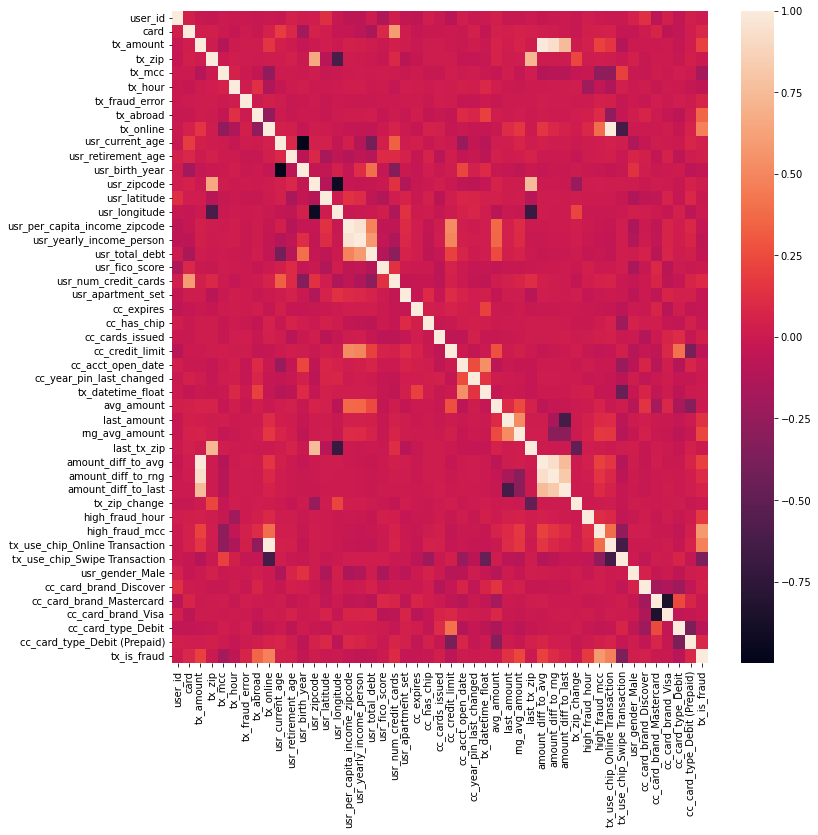

In [25]:
# Create X_temp and attach y variable "tx_is_fraud" to use for plotting heatmap()
X_temp = X_train_eng_rs.copy()
X_temp['tx_is_fraud'] = y_train_eng_rs
fig=plt.figure(figsize=(12,12))
sns.heatmap(X_temp.corr())
plt.show()

### Standardise the data
Standardise the predictor data for use with models

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Note X_train_rs is used here, with the scaled version being assigned to X_train
X_train_eng = pd.DataFrame(scaler.fit_transform(X_train_eng_rs), columns=X_train_eng_rs.columns)
X_test_eng = pd.DataFrame(scaler.transform(X_test_eng), columns=X_test_eng.columns)

In [27]:
# also (for simplicity) assign y_train_eng to the re-sampled y training set, y_train_eng_rs
y_train_eng = y_train_eng_rs

In [28]:
# check X_train is standardised
X_train_eng.describe()

,user_id,card,tx_amount,tx_zip,tx_mcc,tx_hour,tx_fraud_error,tx_abroad,tx_online,usr_current_age,...,high_fraud_hour,high_fraud_mcc,tx_use_chip_Online Transaction,tx_use_chip_Swipe Transaction,usr_gender_Male,cc_card_brand_Discover,cc_card_brand_Mastercard,cc_card_brand_Visa,cc_card_type_Debit,cc_card_type_Debit (Prepaid)
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,...,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,4.440892e-19,9.887646e-16,-7.180367e-17,2.720046e-17,4.521036e-16,3.494011e-16,5.646518e-15,-1.054697e-14,2.218700e-14,-5.852957e-17,...,-6.517287e-16,1.718686e-14,1.089698e-14,-5.078382e-15,-8.665291e-17,1.175789e-15,-9.123813e-16,-2.590705e-16,-1.024320e-15,-5.434750e-15
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.686590e+00,-9.776269e-01,-3.460176e+00,-2.544278e+00,-3.972041e+00,-2.646258e+00,-1.810832e-01,-3.723277e-01,-7.311805e-01,-2.243056e+00,...,-1.206751e+00,-1.021992e+00,-7.307780e-01,-8.745488e-01,-9.838799e-01,-1.732014e-01,-1.110861e+00,-7.663560e-01,-1.205814e+00,-3.074752e-01
25%,-8.566834e-01,-9.776269e-01,-3.920588e-01,-2.642346e-01,-3.372441e-01,-6.833002e-01,-1.810832e-01,-3.723277e-01,-7.311805e-01,-7.586073e-01,...,-1.206751e+00,-1.021992e+00,-7.307780e-01,-8.745488e-01,-9.838799e-01,-1.732014e-01,-1.110861e+00,-7.663560e-01,-1.205814e+00,-3.074752e-01
50%,1.052186e-02,-2.942704e-01,-2.015780e-01,1.208844e-02,3.350207e-03,-2.898089e-02,-1.810832e-01,-3.723277e-01,-7.311805e-01,-1.400871e-01,...,8.286713e-01,9.784815e-01,-7.307780e-01,-8.745488e-01,-9.838799e-01,-1.732014e-01,9.002024e-01,-7.663560e-01,8.293152e-01,-3.074752e-01
75%,8.777271e-01,3.890861e-01,1.367566e-01,1.208844e-02,4.341967e-01,6.253384e-01,-1.810832e-01,-3.723277e-01,1.367651e+00,5.402851e-01,...,8.286713e-01,9.784815e-01,1.368405e+00,1.143447e+00,1.016384e+00,-1.732014e-01,9.002024e-01,1.304877e+00,8.293152e-01,-3.074752e-01
max,1.782232e+00,3.805869e+00,2.213167e+01,2.227892e+00,4.291401e+00,2.370190e+00,5.522324e+00,2.685806e+00,1.367651e+00,2.890662e+00,...,8.286713e-01,9.784815e-01,1.368405e+00,1.143447e+00,1.016384e+00,5.773627e+00,9.002024e-01,1.304877e+00,8.293152e-01,3.252295e+00


## Models with Engineered Features.
Here we will try the best 2 performing models with the new engineered features we have created.

### Definition of scoring function

In [31]:
# definition of function to be used to evaluate classifier.
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

def report_classification_scores(model, X_train, y_train, X_test, y_test, title_text ):
    """Function to report performance of training and test data via Classification reports
    and confusion matrix"""
    y_pred_train=model.predict(X_train)    
    y_pred_test=model.predict(X_test)

    print("\n")
    fig, ax = plt.subplots( nrows=2, ncols=2, figsize=(15, 15) )

    title = f'Results for {title_text}'
    fig.suptitle( title, fontsize=20 )
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, cmap='Blues', ax=ax[0][0])
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, cmap='Reds', ax=ax[0][1])
    RocCurveDisplay.from_estimator(model, X_train, y_train, ax=ax[1][0])
    ax[1][0].plot([0, 1], [0, 1], 'k--', linewidth=4)
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1][1])
    ax[1][1].plot([0, 1], [0, 1], 'k--', linewidth=4)
    
    ax[0][0].set_title('Confusion matrix for training data') 
    ax[0][1].set_title('Confusion matrix for test data') 
    ax[1][0].set_title('ROC curve for training data') 
    ax[1][1].set_title('ROC curve for test data') 
    plt.show()

    print("Classification report for training set:")
    print(classification_report(y_train, y_pred_train, digits=4))
    print("Classification report for test set:")
    print(classification_report(y_test, y_pred_test, digits=4))

### Decision Tree with bagging

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_dtc_model=DecisionTreeClassifier(random_state=42)

bag_eng_classifier=BaggingClassifier(bag_dtc_model, 
                                 n_estimators=50, 
                                 max_samples=0.8,
                                 max_features=0.8,
                                 random_state=1, 
                                 n_jobs=-1,
                                verbose=0)
bag_eng_classifier.fit(X_train_eng, y_train_eng)

print("model fit done.")

model fit done.


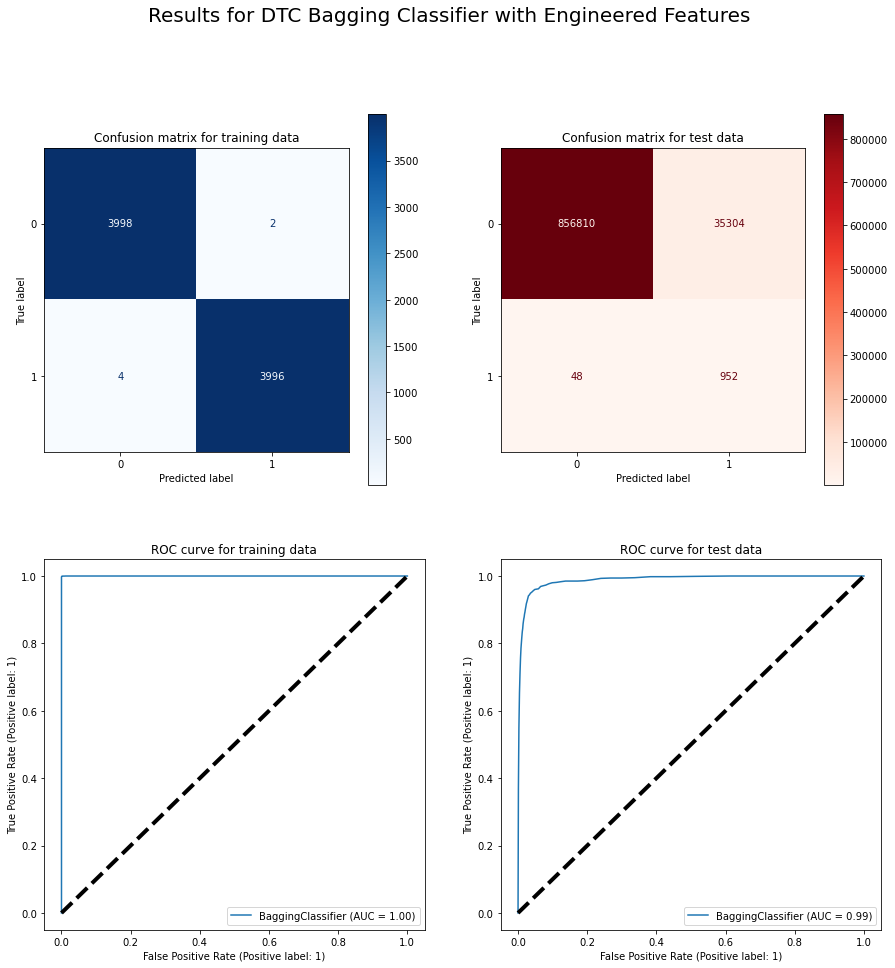

Classification report for training set:
              precision    recall  f1-score   support

           0     0.9990    0.9995    0.9993      4000
           1     0.9995    0.9990    0.9992      4000

    accuracy                         0.9992      8000
   macro avg     0.9993    0.9992    0.9992      8000
weighted avg     0.9993    0.9992    0.9992      8000

Classification report for test set:
              precision    recall  f1-score   support

           0     0.9999    0.9604    0.9798    892114
           1     0.0263    0.9520    0.0511      1000

    accuracy                         0.9604    893114
   macro avg     0.5131    0.9562    0.5154    893114
weighted avg     0.9989    0.9604    0.9787    893114



In [163]:
report_classification_scores(bag_eng_classifier, X_train_eng, y_train_eng, X_test_eng, y_test_eng, "DTC Bagging Classifier with Engineered Features" )

In [33]:
# Comparing this with the results obtained with the standard features:-
# Classification report for test set:
#               precision    recall  f1-score   support

#            0     0.9999    0.9633    0.9813    892114
#            1     0.0282    0.9480    0.0547      1000

#     accuracy                         0.9633    893114
#    macro avg     0.5140    0.9557    0.5180    893114
# weighted avg     0.9989    0.9633    0.9803    893114
# So the new score with engineered features is actually worse for some reason.  This needs further investigation.

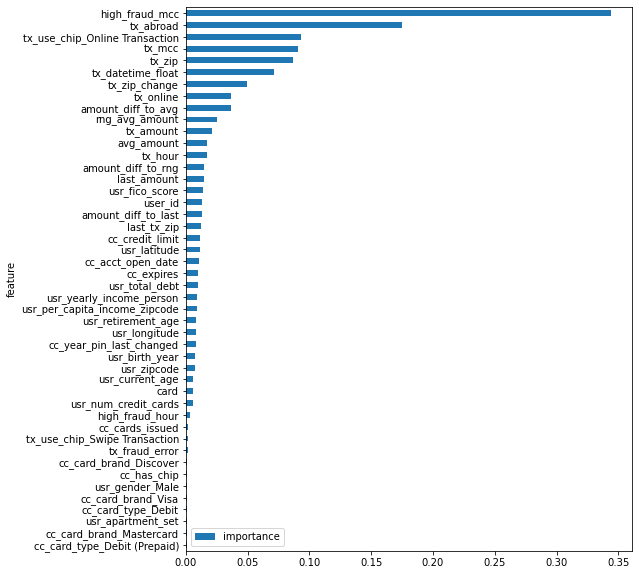

In [34]:
# Calculation of feature importances, averaging across the estimators in the ensemble.
num_features=X_train_eng.shape[1]
num_classifiers=bag_eng_classifier.n_estimators

# create a dictionary of the features
feature_dict = {}

for feature_no in range(0, num_features):
    dict_entry = {}
    dict_entry['name'] = X_train_eng.columns[feature_no] # useful for debug
    dict_entry['importances'] = [] # create a blank list of importances initially.
    feature_dict[feature_no] = dict_entry

# populate the dictionary from the importances in the
# estimators and the list of feature numbers stored in the bagger
for est_no, estimator in enumerate(bag_eng_classifier.estimators_):
    for imp_no, importance in enumerate(estimator.feature_importances_):
        feature_no = bag_eng_classifier.estimators_features_[est_no][imp_no]
#        print( f'estimator {est_no}, feature {feature_no}, importance {importance}' )
        feature_dict[feature_no]['importances'].append(importance)

# calculate the average importance for each feature.
avg_importances = []
for feature_no in feature_dict.keys():
    avg_importance = np.mean(feature_dict[feature_no]['importances'])
#    print( "feature ", feature_dict[feature_no]['name'], " importance ", avg_importance )
    avg_importances.append(avg_importance)

# stort the feature importances in a data frame.
features_df = pd.DataFrame( data=list(zip(X_train_eng.columns, avg_importances)), columns=['feature','importance'] )

# plot data frame.
features_df.sort_values(by='importance').plot(kind='barh', x='feature', figsize=(8,10));

### XGBoost Classifier

Here I have created a couple of bespoke scoring functions to use with XGBoost because I was wanted to experiment with trying to optimise (trigger early stopping) based on accuracy or false-positive rate.

In [293]:
from sklearn.metrics import accuracy_score

# both custom functions convert y_pred to an array of 1's & 0's because XGBoost normally provides it as a probability instead.

# inaccuracy_score is 1-accuracy score because XGBoost wants to find the minimum value provided by the custom scorer.
def inaccuracy_score(y_true, y_pred):   
    return 1-accuracy_score(y_true, np.round(y_pred))

# I wanted to try driving down the number of false positives so I created this scorer.
def false_positive_rate(y_true, y_pred):
    # create binary flags of input variables
    y_true_bin = y_true.astype(int)
    y_pred_bin = np.round(y_pred).astype(int)
    
    # calculate false positive and true negative counts
    false_pos_cnt = np.sum(y_pred_bin & np.logical_not(y_true_bin))
    true_neg_cnt = np.sum(np.logical_not(y_pred_bin) & np.logical_not(y_true_bin))

#    print(f'false positives are {false_pos_cnt} and true negatives are {true_neg_cnt}')
    
    return false_pos_cnt/(true_neg_cnt+false_pos_cnt)

In [325]:
from xgboost import XGBClassifier

xgb_eng_model = XGBClassifier(disable_default_eval_metric=True,
                          random_state=42,
                          n_estimators=500, 
                          n_jobs=-1, 
                          learning_rate=0.1, 
                          early_stopping_rounds=10,
                          #reg_lambda=0.5,
                          eval_metric='auc' )
xgb_eng_model.fit(X_train_eng, y_train_eng, eval_set=[(X_test_eng, y_test_eng)])

[0]	validation_0-auc:0.96958
[1]	validation_0-auc:0.97150
[2]	validation_0-auc:0.97369
[3]	validation_0-auc:0.97487
[4]	validation_0-auc:0.97595
[5]	validation_0-auc:0.97899
[6]	validation_0-auc:0.97938
[7]	validation_0-auc:0.97937
[8]	validation_0-auc:0.98061
[9]	validation_0-auc:0.98148
[10]	validation_0-auc:0.98266
[11]	validation_0-auc:0.98307
[12]	validation_0-auc:0.98332
[13]	validation_0-auc:0.98389
[14]	validation_0-auc:0.98405
[15]	validation_0-auc:0.98420
[16]	validation_0-auc:0.98436
[17]	validation_0-auc:0.98451
[18]	validation_0-auc:0.98488
[19]	validation_0-auc:0.98517
[20]	validation_0-auc:0.98509
[21]	validation_0-auc:0.98497
[22]	validation_0-auc:0.98583
[23]	validation_0-auc:0.98603
[24]	validation_0-auc:0.98630
[25]	validation_0-auc:0.98664
[26]	validation_0-auc:0.98684
[27]	validation_0-auc:0.98704
[28]	validation_0-auc:0.98737
[29]	validation_0-auc:0.98756
[30]	validation_0-auc:0.98781
[31]	validation_0-auc:0.98793
[32]	validation_0-auc:0.98813
[33]	validation_0-au

[268]	validation_0-auc:0.99570
[269]	validation_0-auc:0.99570
[270]	validation_0-auc:0.99571
[271]	validation_0-auc:0.99570
[272]	validation_0-auc:0.99572
[273]	validation_0-auc:0.99573
[274]	validation_0-auc:0.99573
[275]	validation_0-auc:0.99573
[276]	validation_0-auc:0.99574
[277]	validation_0-auc:0.99574
[278]	validation_0-auc:0.99574
[279]	validation_0-auc:0.99574
[280]	validation_0-auc:0.99576
[281]	validation_0-auc:0.99577
[282]	validation_0-auc:0.99577
[283]	validation_0-auc:0.99577
[284]	validation_0-auc:0.99576
[285]	validation_0-auc:0.99575
[286]	validation_0-auc:0.99577
[287]	validation_0-auc:0.99578
[288]	validation_0-auc:0.99578
[289]	validation_0-auc:0.99578
[290]	validation_0-auc:0.99578
[291]	validation_0-auc:0.99579
[292]	validation_0-auc:0.99579
[293]	validation_0-auc:0.99580
[294]	validation_0-auc:0.99579
[295]	validation_0-auc:0.99580
[296]	validation_0-auc:0.99581
[297]	validation_0-auc:0.99582
[298]	validation_0-auc:0.99583
[299]	validation_0-auc:0.99583
[300]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=True, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [326]:
best_pos = xgb_eng_model.best_iteration
best_score = xgb_eng_model.best_score
print("Best iteration was:", best_pos)
print("Best score was:", best_score)

Best iteration was: 373
Best score was: 0.9959931269994642


In [295]:
# Use to find best iteration and score for false_positive_rate metric if not early stopping
# best_pos = np.argmin(xgb_eng_model.evals_result_['validation_0']['false_positive_rate'])
# best_score = xgb_eng_model.evals_result_['validation_0']['false_positive_rate'][best_pos]
# print("Best iteration was:", best_pos)
# print("Best score was:", best_score)

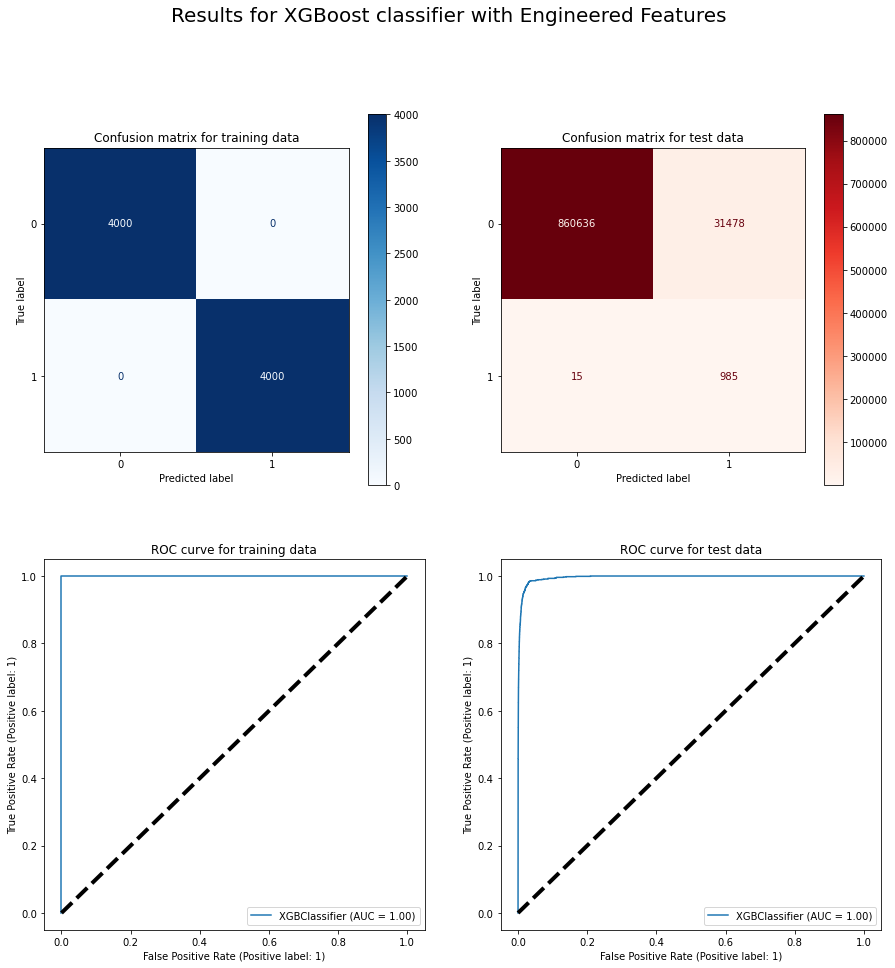

Classification report for training set:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      4000
           1     1.0000    1.0000    1.0000      4000

    accuracy                         1.0000      8000
   macro avg     1.0000    1.0000    1.0000      8000
weighted avg     1.0000    1.0000    1.0000      8000

Classification report for test set:
              precision    recall  f1-score   support

           0     1.0000    0.9647    0.9820    892114
           1     0.0303    0.9850    0.0589      1000

    accuracy                         0.9647    893114
   macro avg     0.5152    0.9749    0.5205    893114
weighted avg     0.9989    0.9647    0.9810    893114



In [327]:
report_classification_scores(xgb_eng_model, X_train_eng, y_train_eng, X_test_eng, y_test_eng, "XGBoost classifier with Engineered Features" )

In [299]:
# Comparing to the results for standard features:-
# Classification report for test set:
#               precision    recall  f1-score   support

#            0     1.0000    0.9619    0.9805    892114
#            1     0.0278    0.9740    0.0541      1000

#     accuracy                         0.9619    893114
#    macro avg     0.5139    0.9679    0.5173    893114
# weighted avg     0.9989    0.9619    0.9795    893114

So now we can see that we have improved precision a little over the XGBoost model based on standard features.  Recall has also gone up a little.  Previously we had 34026 false positives.  Now we have 31478.  This is the best score we have achieved.  So did the new features we created help?  Let's take a look at the feature importances now.

<Figure size 432x288 with 0 Axes>

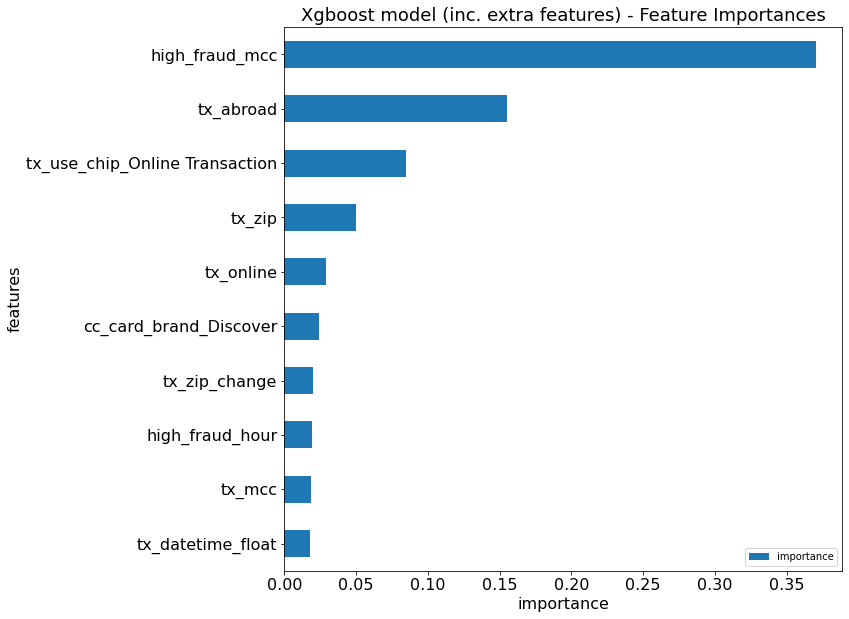

In [328]:
plt.figure()
#sorted_idx = xgb_eng_model.feature_importances_.argsort()
pd.DataFrame(data=list(zip(X_train_eng.columns,xgb_eng_model.feature_importances_)), columns=['feature','importance'] ).\
        sort_values(by='importance').tail(10).plot(kind='barh', x='feature', figsize=(10,10))
# plt.barh(X_train_eng.columns[sorted_idx], xgb_eng_model.feature_importances_[sorted_idx])
plt.xlabel("importance", fontsize=16)
plt.ylabel("features", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title("Xgboost model (inc. extra features) - Feature Importances", fontsize=18)
plt.show()

We can see that some of the features we created have ended up towards the top of the list.  "high_fraud_mcc" is now the most important feature.  "tx_zip_change" (time-series feature) is also important, as is "high_fraud_hour".

### Grid search for better XGBoost parameters

Here we will look to see if we can find better parameters for our XGB classifier via grid search.  Using grid-search's cross validation allows us to optimise on model precision.

In [301]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error

xgb_eng_gs_base_model = XGBClassifier( random_state=42, n_jobs=-1 )

params = { 'max_depth': [3,6,10],
            'learning_rate': [0.01, 0.05, 0.1,0.2,0.5,1.0],
            'n_estimators': [10,50,100,500],
            'colsample_bytree': [0.3,0.6,0.8,1.0],
            'subsample':[0.3,0.6,0.8,1.0],
            'alpha':np.logspace(-2,0,5)}

xgb_eng_gs_model = GridSearchCV( xgb_eng_gs_base_model, params, verbose=4, n_jobs=-1, scoring='precision')

xgb_eng_gs_model.fit(X_train_eng, y_train_eng )

print("Model fit done.")

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


KeyboardInterrupt: 

In [210]:
xgb_eng_gs_model.best_params_
# {'alpha': 0.01,
#  'colsample_bytree': 0.8,
#  'learning_rate': 0.01,
#  'max_depth': 3,
#  'n_estimators': 50,
#  'subsample': 0.8}

{'alpha': 0.01,
 'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

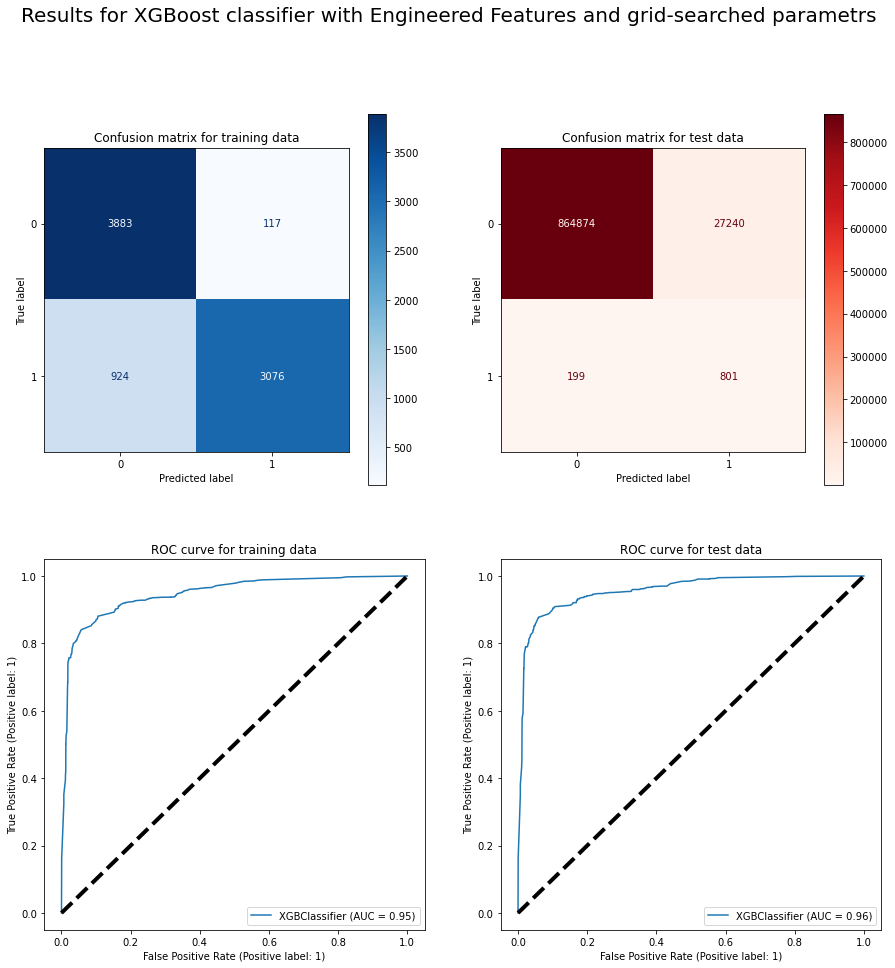

Classification report for training set:
              precision    recall  f1-score   support

           0     0.8078    0.9708    0.8818      4000
           1     0.9634    0.7690    0.8553      4000

    accuracy                         0.8699      8000
   macro avg     0.8856    0.8699    0.8685      8000
weighted avg     0.8856    0.8699    0.8685      8000

Classification report for test set:
              precision    recall  f1-score   support

           0     0.9998    0.9695    0.9844    892114
           1     0.0286    0.8010    0.0552      1000

    accuracy                         0.9693    893114
   macro avg     0.5142    0.8852    0.5198    893114
weighted avg     0.9987    0.9693    0.9833    893114



In [209]:
report_classification_scores(xgb_eng_gs_model.best_estimator_, X_train_eng, y_train_eng, X_test_eng, y_test_eng, "XGBoost classifier with Engineered Features and grid-searched parametrs" )

So in fact now we get a worse score for precision than we did with the stand-alone XGBoost model above.  This is possibly because the cross validation uses the training set only, whereas the native XGBoost cross-validation takes advantage of the testing data as it's "evaluation set".

Let's have a look at feature importances ...

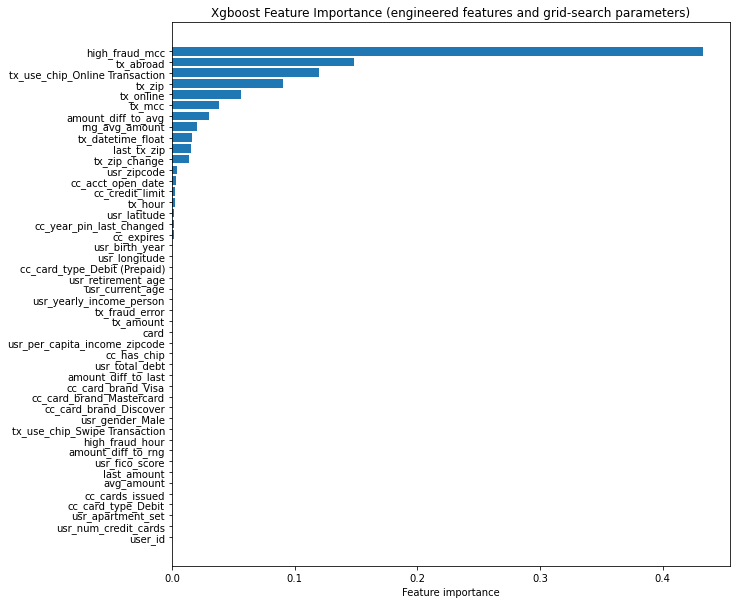

In [213]:
plt.figure(figsize=(10,10))
sorted_idx = xgb_eng_gs_model.best_estimator_.feature_importances_.argsort()
plt.barh(X_train_eng.columns[sorted_idx], xgb_eng_gs_model.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Feature importance")
plt.title("Xgboost Feature Importance (engineered features and grid-search parameters)")
plt.show()

### Shifting the prediction threshold
Here we will look at moving the threshold at which we predict a fraudulent transaction to reduce the number of false positives our model creates.  This will be at the expense of recall (i.e. we would expect to create more false negatives).  Ultimately it would be a business decision on where to accrue costs - on covering the cost of undetected fraud transactions, or manual checks (possibly involving the customer) on transactions flagged as fraud which are actually just "unusual" in some other regard.

Let's have a look at the precision-recall curve ...

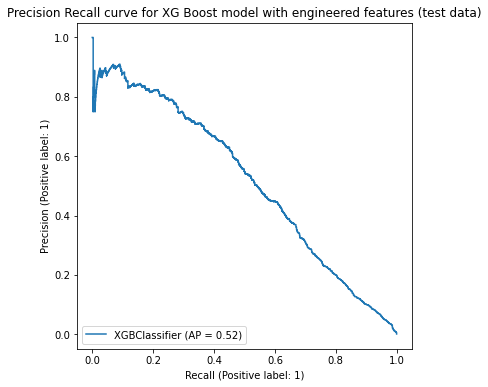

In [329]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(6, 6))
PrecisionRecallDisplay.from_estimator(xgb_eng_model, X_test_eng, y_test_eng, ax=ax)
ax.set_title("Precision Recall curve for XG Boost model with engineered features (test data)")
plt.show()

So it's looking like a fairly straight trade-off here, e.g. moving our precision up to 0.5 will move our recall down to 0.5 (or there abouts).  Let's give it a try ...

In [330]:
# function used to adjust the threshold of prediciton.
def predict_at_threshold(x, threshold=0.5):
    if x >= threshold:
        return 1
    else:
        return 0

In [331]:
# determine the model's predicted probabilities and store in data frames.
Y_pp_train = pd.DataFrame( data=xgb_eng_model.predict_proba(X_train_eng)[:,1], columns=['pp_class_1'] )
Y_pp_test = pd.DataFrame( data=xgb_eng_model.predict_proba(X_test_eng)[:,1], columns=['pp_class_1'] )

In [332]:
# calculate y_pred values using the predict_at_threshold function.
threshold=0.975 # this is the value to tune to find the desired precision/recall trade off. # use 0.99986 to get accuracy BL
Y_pp_train['y_pred'] = Y_pp_train.pp_class_1.apply(predict_at_threshold, threshold=threshold)
Y_pp_test['y_pred'] = Y_pp_test.pp_class_1.apply(predict_at_threshold, threshold=threshold)
y_pred_train = Y_pp_train['y_pred']
y_pred_test = Y_pp_test['y_pred']

In [333]:
y_pred_test.value_counts()

0    887154
1      5960
Name: y_pred, dtype: int64

### Scoring for adjusted threshold

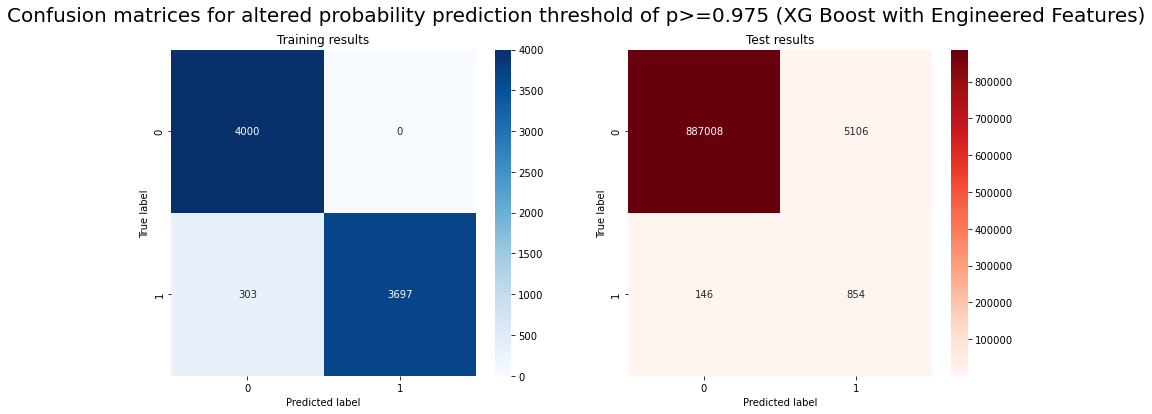

Classification report for training set:
              precision    recall  f1-score   support

           0     0.9296    1.0000    0.9635      4000
           1     1.0000    0.9243    0.9606      4000

    accuracy                         0.9621      8000
   macro avg     0.9648    0.9621    0.9621      8000
weighted avg     0.9648    0.9621    0.9621      8000

Classification report for test set:
              precision    recall  f1-score   support

           0     0.9998    0.9943    0.9970    892114
           1     0.1433    0.8540    0.2454      1000

    accuracy                         0.9941    893114
   macro avg     0.5716    0.9241    0.6212    893114
weighted avg     0.9989    0.9941    0.9962    893114



In [334]:
# calculate the new confusion matrices for training and test data sets
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(15, 6) )
# have to DIY the confusion matrix plots as the plot_confusion_matrix function takes the model and X_train to create y_pred
title=f'Confusion matrices for altered probability prediction threshold of p>={threshold} (XG Boost with Engineered Features)'
fig.suptitle( title, fontsize=20 )
sns.heatmap(data=confusion_matrix(y_train_eng, y_pred_train), annot=True, fmt='g', cmap='Blues', ax=ax[0])
sns.heatmap(data=confusion_matrix(y_test_eng, y_pred_test), annot=True, fmt='g', cmap='Reds', ax=ax[1])
ax[0].set_title('Training results') 
ax[1].set_title('Test results') 
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')

plt.show()

print("Classification report for training set:")
print(classification_report(y_train_eng, y_pred_train, digits=4))
print("Classification report for test set:")
print(classification_report(y_test_eng, y_pred_test, digits=4))

So this could be a reasonable trade off - looking at the test set I've got ~15% of fraud cases being misclassified as not fraud (this is a 10 fold increase over the 0.5 threshold.)  But I have reduced the number of false positives by a factor of ~6, bringing those cases down to about 0.5% of all cases.

### Experiment - ANN Classifier
Having just learnt the methods to implement an artificial neural net in sklearn, I thought it would be worth experimenting with it here to see what the resluts might be like.

In [49]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', # overtrains with lbfgs
                    alpha=10**(0), # 10**(0)
                    hidden_layer_sizes=(46,23,12,6),
                    activation='relu',
                    random_state=42,
                    batch_size=80,
                    max_iter=5000)
clf.fit(X_train_eng, y_train_eng)

MLPClassifier(alpha=1, batch_size=80, hidden_layer_sizes=(46, 23, 12, 6),
              max_iter=5000, random_state=42)

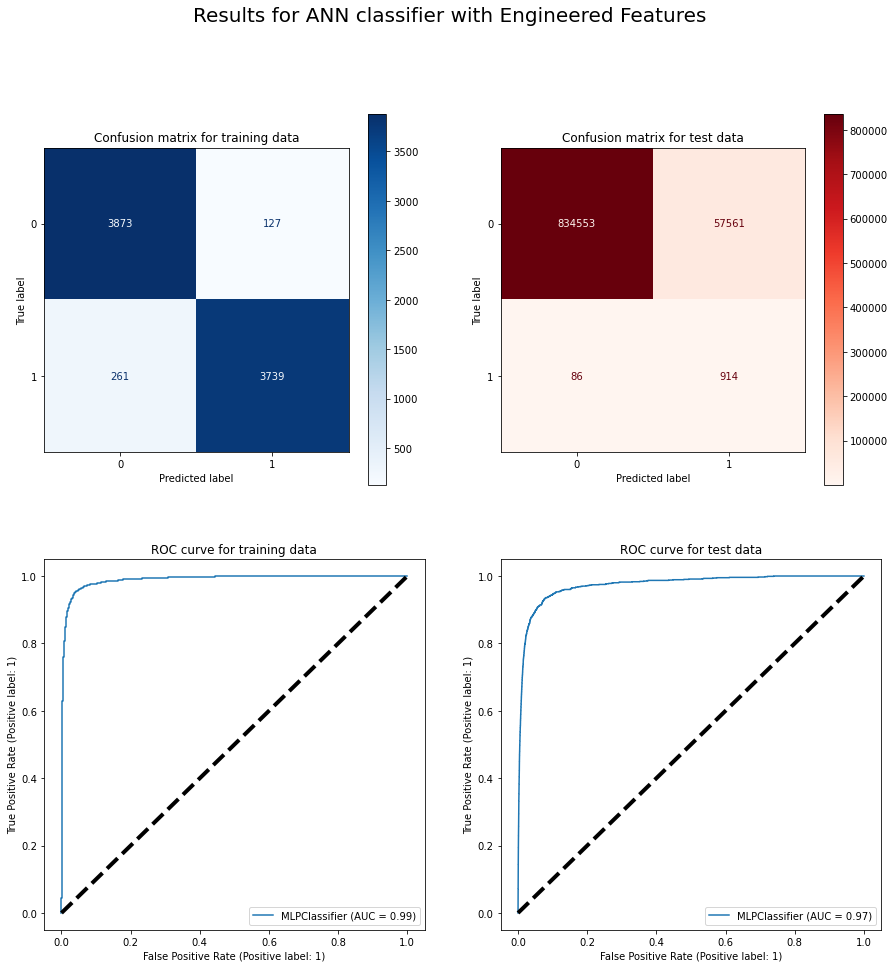

Classification report for training set:
              precision    recall  f1-score   support

           0     0.9369    0.9683    0.9523      4000
           1     0.9671    0.9347    0.9507      4000

    accuracy                         0.9515      8000
   macro avg     0.9520    0.9515    0.9515      8000
weighted avg     0.9520    0.9515    0.9515      8000

Classification report for test set:
              precision    recall  f1-score   support

           0     0.9999    0.9355    0.9666    892114
           1     0.0156    0.9140    0.0307      1000

    accuracy                         0.9355    893114
   macro avg     0.5078    0.9247    0.4987    893114
weighted avg     0.9988    0.9355    0.9656    893114



In [50]:
report_classification_scores(clf, X_train_eng, y_train_eng, X_test_eng, y_test_eng, "ANN classifier with Engineered Features" )

Clearly we are not getting quite such good results here as we do with XGBoost.  We could probably improve it with better ANN parameters, but there are a lot of parameters to tune.  A grid search would be the best approach, although we may need to find a big machine to run it on (possibly on the cloud) as ANN fitting is slow.

## Further Work

There is lots of potential to do more here.

First up should perhaps be a detailed analysis of where the model is "getting it wrong" at the moment.  Are there any particular features which are relevant in that respect and can we direct our model towards them with additional engineered features, etc.

We can add additional engineered features.  Some initial thoughts would be:-
- Merchant staying the same between consecutive transactions.
- Add in a weekday field (perhaps more fraud happens on certain week days).
- Difference in zip code between home and where the transaction takes place.
- Difference between the transaction date and when the account was opened.
- Difference between (federal) state between transactions
- Switch to online transactions after cardholder present ones.
- Flag for the last transaction being fraud - likely to be in a sequence.
- Transaction amount as a proportion of a user's credit limit.

Also we could experiment with the time-series features, e.g. changing the "window" used for running average transaction amount.

We could try more types of models and/or optimise the models we've used so far.  I would like to research XG Boost more and understand how to better tune the parameters and possibly grid search for the best setup for this problem.

We could also do more work to understand the importance of model coefficients.  We could use a stats model to see which coefficients are statistically "sound" (non-zero with >95% confidence for example).  With XG Boost there are also approaches that can be taken to look at the sensitivity of the model to the coefficients used which gives further insights into feature importances (https://mljar.com/blog/feature-importance-xgboost/).

We could train our model using more data (a bigger subset of the original data set).  We could also experiment with the class balance by changing the amount of undersampling used (or oversample the minority class with SMOTE or similar).  If we use more data we might need 

It would be nice to look at the geographic features in the data and plot these on a map, e.g. using Tableau.  Plotting locations of fraudulent transactions could be interesting.  These could perhaps be correlated with crime data for other types of crime too.
